In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage import morphology
import cv2 as cv2
from skimage import filters

# Example 

## Open a picture which was made under magnifying glass

In [72]:
# auto
i = "ISIC_0064690"
pic2 = plt.imread('../data/example_image/new_dataset/'+i+'.jpg')
#plt.imshow(pic2, cmap='gray')

## Convert it to grayscale

In [73]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(pic2)
#plt.imshow(gray, cmap='gray')

## Apply two different masks

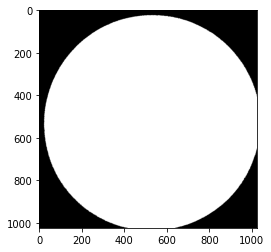

In [91]:
#plt.imshow(gray, cmap='gray')
mymask1 = gray > 20   #Pixels with higher intensities will be equal to 1 in the mask
mymask2 = gray < 145  #Pixels with lower intensities will be equal to 1 in the mask
plt.imshow(mymask1, cmap='gray')
#plt.imshow(mymask2, cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


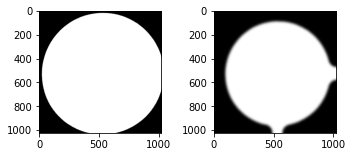

In [99]:
struct_el = morphology.disk(70)

#print(struct_el)
mask_eroded = morphology.binary_erosion(mymask1, struct_el)

# Show side by side

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mymask1, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

blurred = filters.gaussian(mask_eroded,sigma=10)

plt.imshow(blurred, cmap='gray')

# Verify it's smaller
#print(area)
#print(np.sum(mask_eroded))

In [111]:
#plt.imshow(mymask1, cmap='gray')
final_mask = (255-mymask1) + (255-mymask2)
#final_mask = (255-blurred) + (255-mymask2)
#plt.imshow(final_mask, cmap='gray')

<Figure size 432x288 with 0 Axes>

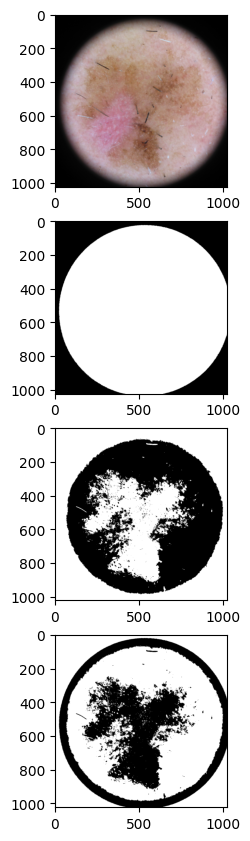

In [112]:
plt.figure()
#figure(figsize=(4, 1), dpi=80)

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(4,1, dpi=100)
f.set_size_inches(18.5, 10.5)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(pic2, cmap='gray')
axarr[1].imshow(mymask1,cmap='gray')
axarr[2].imshow(mymask2,cmap='gray')
axarr[3].imshow(final_mask,cmap='gray')